In [1]:
# 1. Imports and Setup
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2. Parameters and Paths
target_layer = 32  # <-- change this value for each notebook run

data_dir = '../results'
insight_file = 'probe_layer_insight.csv'

# File paths for the chosen layer
train_path = f"{data_dir}/llama_train_layer{target_layer}_features.csv"
test_path  = f"{data_dir}/llama_test_layer{target_layer}_features.csv"

# 3. Load Data
train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

In [3]:
# Extract features and labels
feature_cols = [c for c in train_df.columns if c.startswith('hidden_')]
X_train = train_df[feature_cols].values
y_train = train_df['label'].values
X_test  = test_df[feature_cols].values
y_test  = test_df['label'].values

In [ ]:
# # 4. Train Linear Probe
# params = {'C': [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]}
# probe = GridSearchCV(
#   LogisticRegression(penalty='l1', solver='saga', max_iter=100), param_grid=params, cv=5, n_jobs=6
# )
# probe.fit(X_train, y_train)
# print("best C:", probe.best_params_)
# print("CV accuracy:", probe.best_score_)

# # 5. Overall Evaluation & Visualization
# display_labels = ['past', 'present', 'future']
# y_pred = probe.predict(X_test)

# # random-label control
# y_rand = np.random.permutation(y_train)
# probe.fit(X_train, y_rand)
# print("random-label acc:", probe.best_score_)

# overall_report_dict = classification_report(y_test, y_pred, target_names=display_labels, output_dict=True)
# overall_accuracy = accuracy_score(y_test, y_pred)

# print(f"Layer {target_layer} - Overall Accuracy: {overall_accuracy:.4f}")
# print(classification_report(y_test, y_pred, target_names=display_labels))

In [4]:
# 4. Train Linear Probe
probe = LogisticRegression(
    penalty='l1',
    solver='saga',
    C=1e-2,
    max_iter=100, 
    n_jobs=6
)
probe.fit(X_train, y_train)

# 5. Overall Evaluation & Visualization
display_labels = ['past', 'present', 'future']
y_pred = probe.predict(X_test)

/auto/brno2/home/ariuka/tense/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
overall_report_dict = classification_report(y_test, y_pred, target_names=display_labels, output_dict=True)
overall_accuracy = accuracy_score(y_test, y_pred)

print(f"Layer {target_layer} - Overall Accuracy: {overall_accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=display_labels))

Layer 32 - Overall Accuracy: 0.8754
              precision    recall  f1-score   support

        past       0.93      0.93      0.93      1549
     present       0.85      0.85      0.85      1549
      future       0.84      0.84      0.84      1548

    accuracy                           0.88      4646
   macro avg       0.88      0.88      0.88      4646
weighted avg       0.88      0.88      0.88      4646



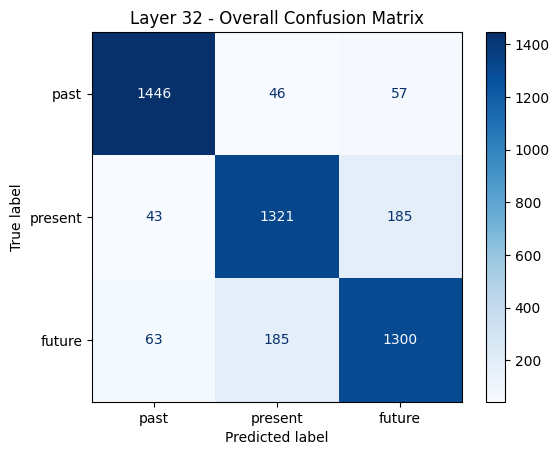

In [6]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Layer {target_layer} - Overall Confusion Matrix")
plt.show()

Layer 32, Language: en, Accuracy: 0.9367
              precision    recall  f1-score   support

        past       0.96      0.94      0.95       200
     present       0.95      0.91      0.93       200
      future       0.90      0.95      0.92       200

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



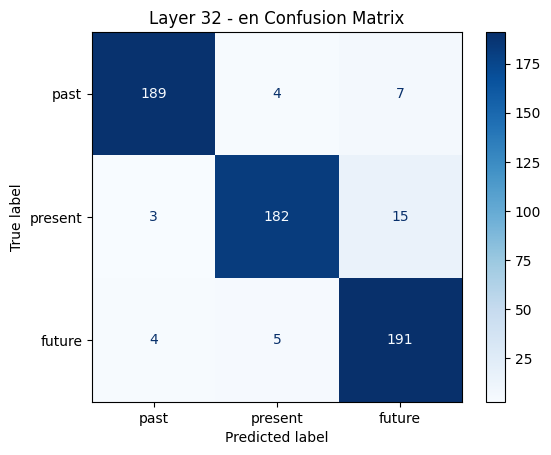

Layer 32, Language: de, Accuracy: 0.7517
              precision    recall  f1-score   support

        past       0.88      0.92      0.90       200
     present       0.70      0.70      0.70       200
      future       0.67      0.63      0.65       200

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.75      0.75      0.75       600



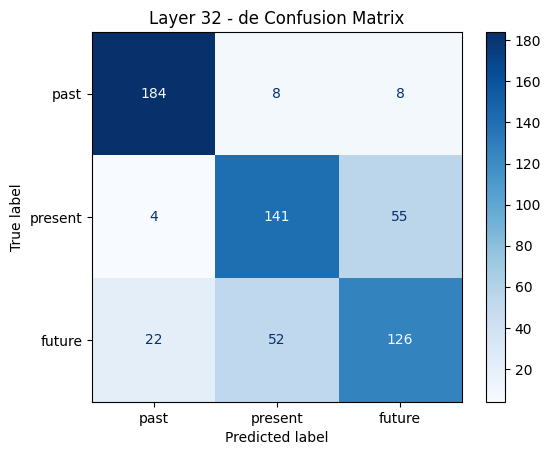

Layer 32, Language: fr, Accuracy: 0.7950
              precision    recall  f1-score   support

        past       0.88      0.75      0.81       200
     present       0.75      0.85      0.80       200
      future       0.77      0.79      0.78       200

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



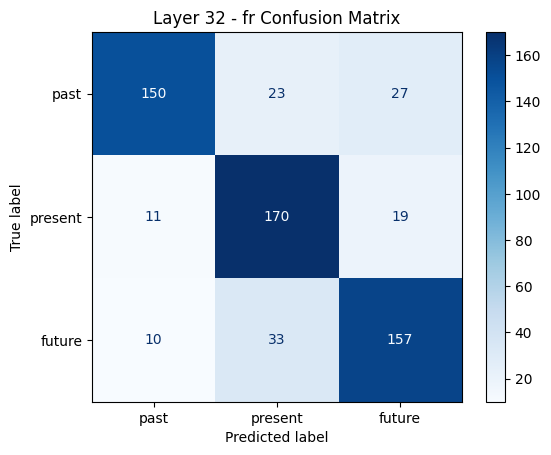

Layer 32, Language: it, Accuracy: 0.8167
              precision    recall  f1-score   support

        past       0.91      0.97      0.94       200
     present       0.78      0.73      0.76       200
      future       0.76      0.74      0.75       200

    accuracy                           0.82       600
   macro avg       0.81      0.82      0.81       600
weighted avg       0.81      0.82      0.81       600



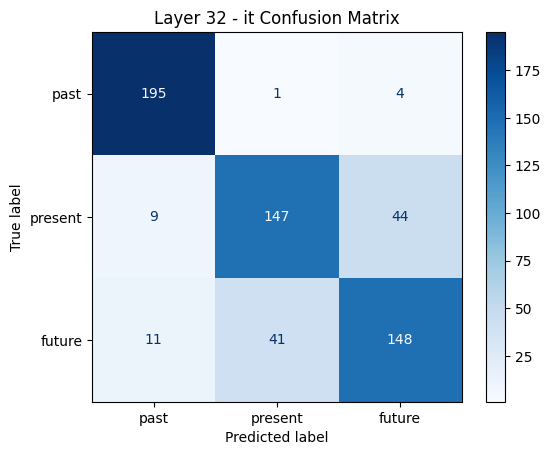

Layer 32, Language: pt, Accuracy: 0.8883
              precision    recall  f1-score   support

        past       0.95      0.94      0.95       200
     present       0.86      0.85      0.86       200
      future       0.85      0.87      0.86       200

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



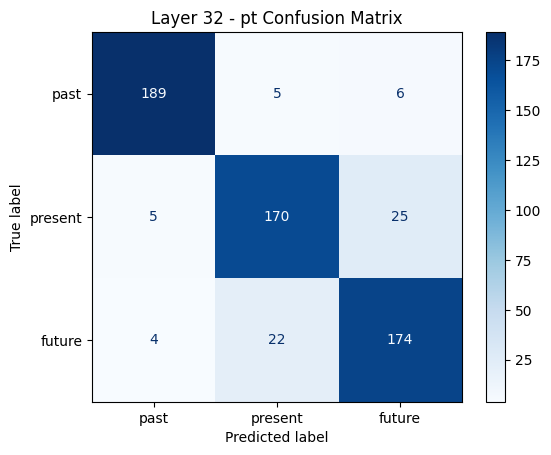

Layer 32, Language: es, Accuracy: 0.8667
              precision    recall  f1-score   support

        past       0.90      0.97      0.93       200
     present       0.84      0.81      0.83       200
      future       0.86      0.81      0.84       200

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



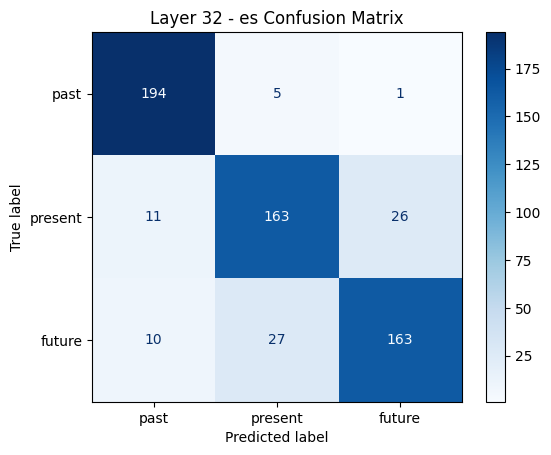

Layer 32, Language: hi, Accuracy: 0.9967
              precision    recall  f1-score   support

        past       1.00      0.99      1.00       200
     present       1.00      0.99      1.00       200
      future       0.99      1.00      1.00       200

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



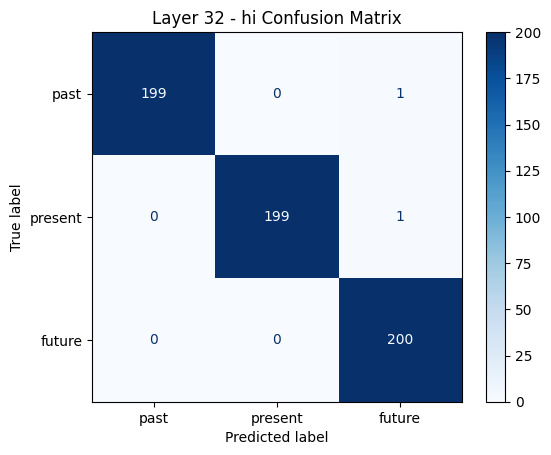

Layer 32, Language: th, Accuracy: 0.9776
              precision    recall  f1-score   support

        past       0.99      0.98      0.98       149
     present       0.97      1.00      0.98       149
      future       0.98      0.95      0.97       148

    accuracy                           0.98       446
   macro avg       0.98      0.98      0.98       446
weighted avg       0.98      0.98      0.98       446



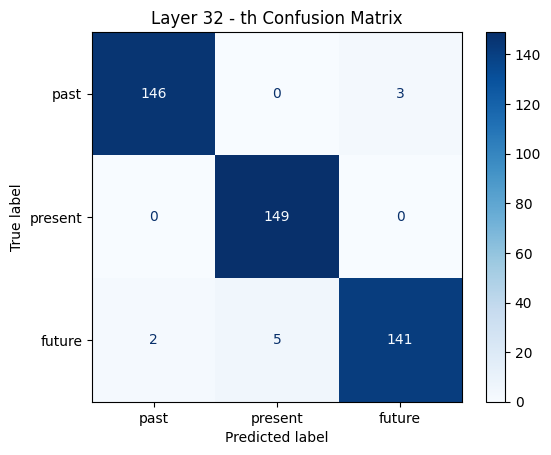

In [7]:
# 6. Language‐Specific Evaluation & Visualization
lang_results = {}
if 'language' in test_df.columns:
    for lang in test_df['language'].unique():
        mask = test_df['language'] == lang
        y_true_lang = y_test[mask]
        y_pred_lang = probe.predict(X_test[mask])

        report_dict = classification_report(
            y_true_lang, y_pred_lang, target_names=display_labels, output_dict=True)
        acc_lang = accuracy_score(y_true_lang, y_pred_lang)
        lang_results[lang] = {
            'accuracy': acc_lang,
            'report': report_dict
        }
        
        print(f"Layer {target_layer}, Language: {lang}, Accuracy: {acc_lang:.4f}")
        print(classification_report(y_true_lang, y_pred_lang, target_names=display_labels))
        cm_lang = confusion_matrix(y_true_lang, y_pred_lang)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_lang, display_labels=display_labels)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Layer {target_layer} - {lang} Confusion Matrix")
        plt.show()
else:
    print("No 'language' column found in test data. Skipping per-language evaluation.")

In [8]:
# 7. Log Insights to CSV
data_entry = {
    'layer': target_layer,
    'overall_accuracy': overall_accuracy,
    # store overall report as string or JSON
    'overall_report': overall_report_dict
}
# add per-language accuracies
data_entry.update({f"acc_{lang}": info['accuracy'] for lang, info in lang_results.items()})

insight_df = pd.DataFrame([data_entry])
if os.path.exists(insight_file):
    insight_df.to_csv(insight_file, mode='a', header=False, index=False)
else:
    insight_df.to_csv(insight_file, index=False)

print(f"Insights for layer {target_layer} appended to {insight_file}.")

Insights for layer 32 appended to probe_layer_insight.csv.
